In [1]:
#Pulled weather data from
#https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/statewide/mapping/110/tavg/201412/12/value

#Average Temperatures
#Removed unneccessary columns, converted state names to just initials, used left formula to extract out state only


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
#pulled new data from: https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/statewide/mapping/110/pcp/201812/12/value
#Removed headers, updated state to two letter values.
#combined each year to a sheet per spreadsheet, saved .xlsx

In [6]:
df_tavg_dict = pd.read_excel('../data/tavg.xlsx',sheet_name = None)
#all are imported as dictionary, sheet names are the keys, use concate and ignore_index to make it into DF
df_tavg = pd.concat(df_tavg_dict.values(),ignore_index=True)
df_tavg

,Year,State,Temp,Region
0,2010,AL,62.7,SOUTH
1,2010,AR,60.4,SOUTH
2,2010,AZ,61.2,WEST
3,2010,CA,57.7,WEST
4,2010,CO,46.2,WEST
...,...,...,...,...
523,2020,VT,57.4,NORTHEAST
524,2020,WA,48.1,WEST
525,2020,WI,54.0,MIDWEST
526,2020,WV,44.8,SOUTH


In [7]:
df_precip_dict = pd.read_excel('../data/precip.xlsx',sheet_name = None)
#all are imported as dictionary, sheet names are the keys, use concate and ignore_index to make it into DF
df_precip = pd.concat(df_precip_dict.values(),ignore_index=True)
df_precip

,Year,State,Precip,Region
0,2010,AL,47.19,SOUTH
1,2010,AR,13.91,SOUTH
2,2010,AZ,38.79,WEST
3,2010,CA,31.18,WEST
4,2010,CO,18.19,WEST
...,...,...,...,...
523,2020,VT,61.40,NORTHEAST
524,2020,WA,45.25,WEST
525,2020,WI,53.77,MIDWEST
526,2020,WV,34.19,SOUTH


In [8]:
#colors
#light green, dark green, cream, light orange, dark orange - 
colors_5 = ['#8cb369','#f4e285','#f4a259','#5b8e7d','#bc4b51']
#17 colors listed in this one
colors = ['#264653','#2a9d8f','#e9c46a','#f4a261','#e76f51','#6f1d1b','#bb9457','#432818','#99582a','#ffe6a7','#52796f','#566e3d','#0c4767','#fa7921','#fe9920','#276234','#6f2424']


In [8]:
#NOT USED - WEST REGION - AVERAGE TEMP 2010-2019 graph, filtering on region
region_w = 'WEST'
w_states = ['AZ','CA','CO','ID','MT','NM','NV','OR','UT','WA','WY']
#look for west in df
find_west = df_tavg[df_tavg['Region']==region_w]
#find states that are associated to west
find_west=find_west[find_west['Location'].isin(w_states)]

#one line for each state
grouped_df = find_west.groupby('Location')
plt.figure(figsize=(10,5))
#use enumerate to access list of colors per state
for i,(state, data) in enumerate(grouped_df):
    plt.plot(data['Year'], data['Temp'], label=state, color=colors[i])

plt.xlabel('Year')
plt.ylabel('Average Temp WEST')
plt.legend()
plt.show()

KeyError: 'Location'

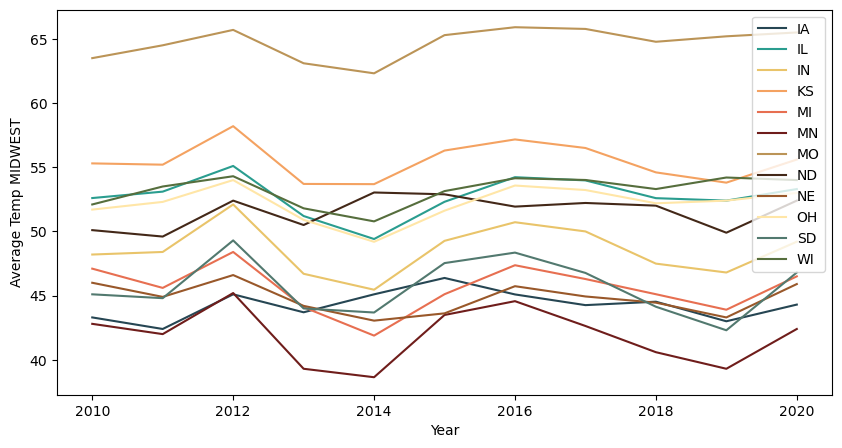

In [ ]:
#NOT USED - MIDWEST REGION - AVERAGE TEMP 2010-2019 graph, filtering on region
region_mw = 'MIDWEST'
mw_states = ['IA','IL','IN','KS','MI','MN','MO','ND','NE','OH','SD','WI']
#look for west in df
find_midwest = df_tavg[df_tavg['Region']==region_mw]
#find states that are associated to west
find_midwest=find_midwest[find_midwest['Location'].isin(mw_states)]

#one line for each state
grouped_df = find_midwest.groupby('Location')
plt.figure(figsize=(10,5))
#use enumerate to access list of colors per state
for i,(state, data) in enumerate(grouped_df):
    plt.plot(data['Year'], data['Temp'], label=state, color=colors[i])

plt.xlabel('Year')
plt.ylabel('Average Temp MIDWEST')
plt.legend()
plt.show()

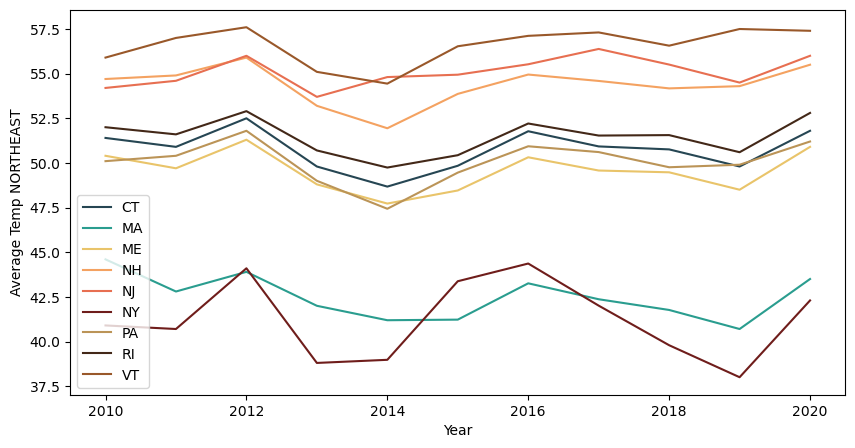

In [ ]:
#NOT USED - NORTHEAST REGION - AVERAGE TEMP 2010-2019 graph, filtering on region
region_ne = 'NORTHEAST'
ne_states = ['CT','MA','ME','NH','NJ','NY','PA','RI','VT']
#look for west in df
find_northeast = df_tavg[df_tavg['Region']==region_ne]
#find states that are associated to west
find_northeast=find_northeast[find_northeast['Location'].isin(ne_states)]

#one line for each state
grouped_df = find_northeast.groupby('Location')
plt.figure(figsize=(10,5))
#use enumerate to access list of colors per state
for i,(state, data) in enumerate(grouped_df):
    plt.plot(data['Year'], data['Temp'], label=state, color=colors[i])

plt.xlabel('Year')
plt.ylabel('Average Temp NORTHEAST')
plt.legend()
plt.show()

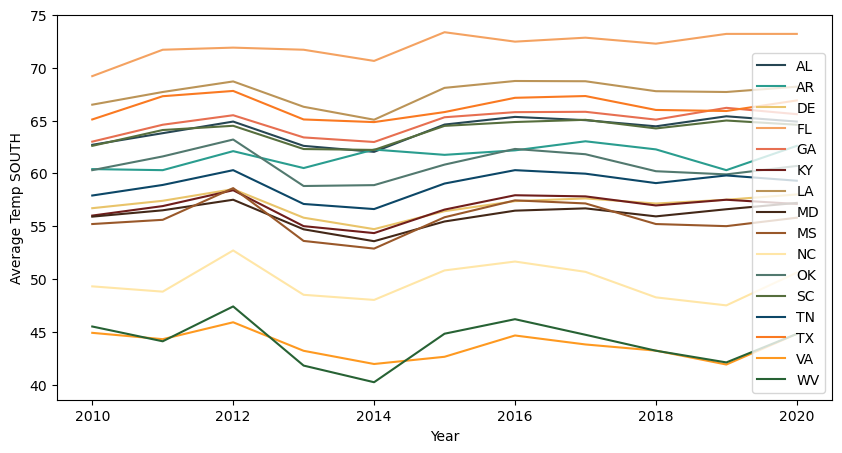

In [ ]:
#NOT USED -SOUTH REGION - AVERAGE TEMP 2010-2020 graph, filtering on region
region_s = 'SOUTH'
s_states = ['AL','AR','DE','FL','GA','KY','LA','MD','MS','NC','OK','SC','TN','TX','VA','WV']
#look for west in df
find_south = df_tavg[df_tavg['Region']==region_s]
#find states that are associated to west
find_south=find_south[find_south['Location'].isin(s_states)]

#one line for each state
grouped_df = find_south.groupby('Location')
plt.figure(figsize=(10,5))
#use enumerate to access list of colors per state
for i,(state, data) in enumerate(grouped_df):
    plt.plot(data['Year'], data['Temp'], label=state, color=colors[i])

plt.xlabel('Year')
plt.ylabel('Average Temp SOUTH')
plt.legend()
plt.show()

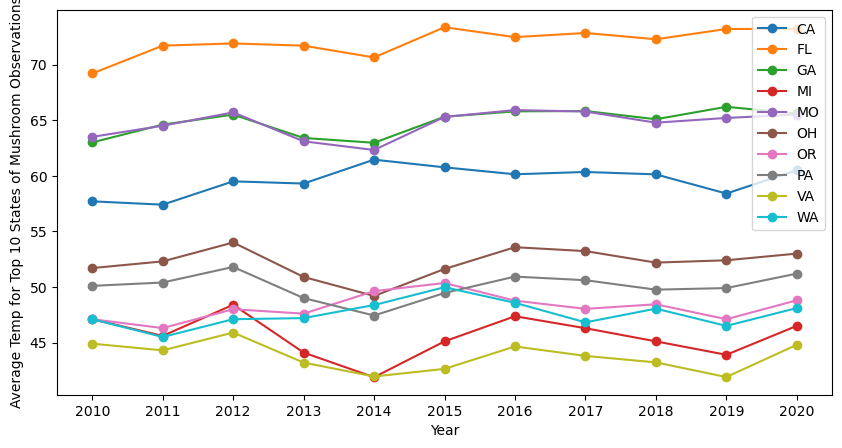

In [21]:
#suggestion to see the top 5 & lower 5 OR top 10 (which would match could go along with the top 10 state?)

#Top 10 states for Mushroom observations
#top5_states = ['CA', 'PA','WA','OR','GA']
top10_states = ['CA', 'PA','WA','OR','GA','MI','OH','VA','FL','MO']
#find states out of the datafram
find_top10 = df_tavg[df_tavg['State'].isin(top10_states)]

#one line for each state
#grouped_df = find_top10.groupby('State')
plt.figure(figsize=(10,5))

#one line for each state
for state, data in find_top10.groupby('State'):
    plt.plot(data['Year'],data['Temp'], label=state,marker='o')

plt.xticks(df_tavg['Year'].unique())

plt.xlabel('Year')
plt.ylabel('Average Temp for Top 10 States of Mushroom Observations')
plt.legend()
plt.show()

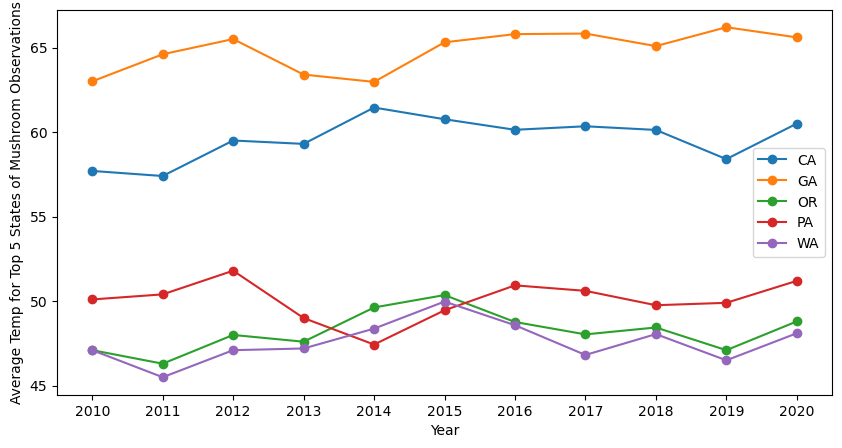

In [29]:
#suggestion to see the top 5 & lower 5 OR top 10 (which would match could go along with the top 10 state?)

#Top 10 states for Mushroom observations
top5_states = ['CA', 'PA','WA','OR','GA']
#top10_states = ['CA', 'PA','WA','OR','GA','MI','OH','VA','FL','MO']
#find states out of the datafram
find_top5 = df_tavg[df_tavg['State'].isin(top5_states)]

colors_five=['#8cb369', '#f4e285', '#f4a259', '#5b8e7d', '#bc4b51']
#one line for each state
#grouped_df = find_top10.groupby('State')
plt.figure(figsize=(10,5))

for state, data in find_top5.groupby('State'):
    plt.plot(data['Year'],data['Temp'], label=state,marker='o')
#show each year
plt.xticks(df_tavg['Year'].unique())

plt.xlabel('Year')
plt.ylabel('Average Temp for Top 5 States of Mushroom Observations')
plt.legend()
plt.show()

#From this graph, i think i should be able to see which specific mushrooms prefer warmer weather

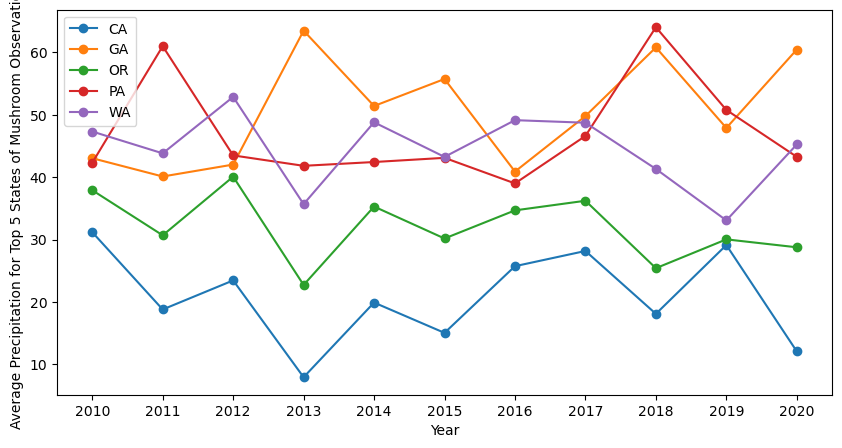

In [9]:
#Top 10 states for Mushroom observations - PRECIPITATION
top5_states = ['CA', 'PA','WA','OR','GA']
#top10_states = ['CA', 'PA','WA','OR','GA','MI','OH','VA','FL','MO']
#find states out of the datafram
find_top5p = df_precip[df_precip['State'].isin(top5_states)]

#one line for each state
#grouped_df = find_top10.groupby('State')
plt.figure(figsize=(10,5))

for state, data in find_top5p.groupby('State'):
    plt.plot(data['Year'],data['Precip'], label=state,marker='o')
#show each year
plt.xticks(df_tavg['Year'].unique())

plt.xlabel('Year')
plt.ylabel('Average Precipitation for Top 5 States of Mushroom Observations')
plt.legend()
plt.show()

In [ ]:
#Need to make graphs specifically for CA, GA and PA.
#include both the precipitation and the average temperature, and identify the best year 

In [10]:
#Isolate GA temps
ga_temp = df_tavg[df_tavg['State']=='GA']
ga_temp

,Year,State,Temp,Region
8,2010,GA,63.0000,SOUTH
56,2011,GA,64.6000,SOUTH
104,2012,GA,65.5000,SOUTH
152,2013,GA,63.4000,SOUTH
200,2014,GA,62.9667,SOUTH
248,2015,GA,65.3083,SOUTH
296,2016,GA,65.7917,SOUTH
344,2017,GA,65.8250,SOUTH
392,2018,GA,65.0833,SOUTH
440,2019,GA,66.2000,SOUTH


In [30]:
#Isolate GA Precipitation
ga_precip = df_precip[df_precip['State']=='GA']
ga_precip

,Year,State,Precip,Region
8,2010,GA,43.04,SOUTH
56,2011,GA,40.11,SOUTH
104,2012,GA,42.02,SOUTH
152,2013,GA,63.49,SOUTH
200,2014,GA,51.41,SOUTH
248,2015,GA,55.74,SOUTH
296,2016,GA,40.90,SOUTH
344,2017,GA,49.80,SOUTH
392,2018,GA,60.80,SOUTH
440,2019,GA,47.89,SOUTH


In [32]:
#Combine temps and precip for GA  - axis=1 concatenates horizontally instead of vertically
#since the year, state and region are the same, i only want to pick up the precipitation column
ga_precip_col = ga_precip['Precip']
ga_combined = pd.concat([ga_temp,ga_precip_col],axis=1)
ga_combined

,Year,State,Temp,Region,Precip
8,2010,GA,63.0000,SOUTH,43.04
56,2011,GA,64.6000,SOUTH,40.11
104,2012,GA,65.5000,SOUTH,42.02
152,2013,GA,63.4000,SOUTH,63.49
200,2014,GA,62.9667,SOUTH,51.41
248,2015,GA,65.3083,SOUTH,55.74
296,2016,GA,65.7917,SOUTH,40.90
344,2017,GA,65.8250,SOUTH,49.80
392,2018,GA,65.0833,SOUTH,60.80
440,2019,GA,66.2000,SOUTH,47.89


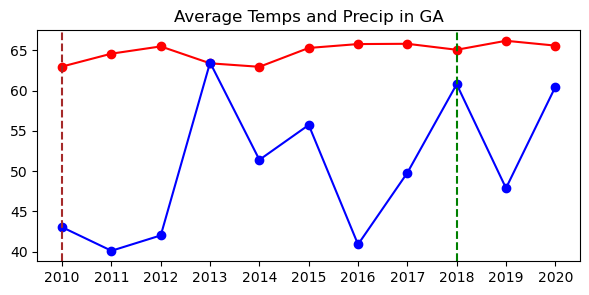

In [63]:
#Make a visual with both
fig, ax = plt.subplots(figsize=(7,3))
#plot temps in red
ax.plot(ga_combined['Year'],ga_combined['Temp'],marker='o',label='Average Temperature',color='red')
#plot precip in blue
ax.plot(ga_combined['Year'],ga_combined['Precip'], marker='o',label='Average Precipitation',color='blue')
#see each year by using ticks
ax.set_xticks(ga_combined['Year'])
ax.set_title('Average Temps and Precip in GA')
#add note for 2018
ga_boom = 2018
ax.axvline(x=ga_boom,color='green',linestyle='--')
ga_worst = 2010
ax.axvline(x=ga_worst,color='brown',linestyle='--')

plt.show()

In [43]:
#Isolate CA temps
ca_temp = df_tavg[df_tavg['State']=='CA']
ca_temp

,Year,State,Temp,Region
3,2010,CA,57.7000,WEST
51,2011,CA,57.4000,WEST
99,2012,CA,59.5000,WEST
147,2013,CA,59.3000,WEST
195,2014,CA,61.4500,WEST
243,2015,CA,60.7583,WEST
291,2016,CA,60.1333,WEST
339,2017,CA,60.3417,WEST
387,2018,CA,60.1250,WEST
435,2019,CA,58.4000,WEST


In [44]:
#Isolate CA Precipitation
ca_precip = df_precip[df_precip['State']=='CA']
ca_precip

,Year,State,Precip,Region
3,2010,CA,31.18,WEST
51,2011,CA,18.79,WEST
99,2012,CA,23.45,WEST
147,2013,CA,7.93,WEST
195,2014,CA,19.90,WEST
243,2015,CA,15.04,WEST
291,2016,CA,25.73,WEST
339,2017,CA,28.17,WEST
387,2018,CA,18.09,WEST
435,2019,CA,29.12,WEST


In [45]:
#Combine temps and precip for CA  - axis=1 concatenates horizontally instead of vertically
#since the year, state and region are the same, i only want to pick up the precipitation column
ca_precip_col = ca_precip['Precip']
ca_combined = pd.concat([ca_temp,ca_precip_col],axis=1)
ca_combined

,Year,State,Temp,Region,Precip
3,2010,CA,57.7000,WEST,31.18
51,2011,CA,57.4000,WEST,18.79
99,2012,CA,59.5000,WEST,23.45
147,2013,CA,59.3000,WEST,7.93
195,2014,CA,61.4500,WEST,19.90
243,2015,CA,60.7583,WEST,15.04
291,2016,CA,60.1333,WEST,25.73
339,2017,CA,60.3417,WEST,28.17
387,2018,CA,60.1250,WEST,18.09
435,2019,CA,58.4000,WEST,29.12


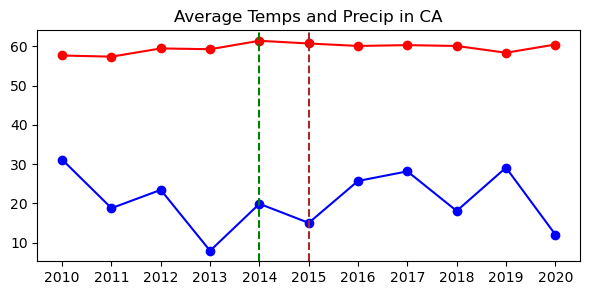

In [62]:
#Make a visual with both
fig, ax = plt.subplots(figsize=(7,3))
#plot temps in red
ax.plot(ca_combined['Year'],ca_combined['Temp'],marker='o',label='Average Temperature',color='red')
#plot precip in blue
ax.plot(ca_combined['Year'],ca_combined['Precip'], marker='o',label='Average Precipitation',color='blue')
#see each year by using ticks
ax.set_xticks(ca_combined['Year'])
ax.set_title('Average Temps and Precip in CA')
#add note for 2018
ca_boom = 2014
ax.axvline(x=ca_boom,color='green',linestyle='--')
ca_worst= 2015
ax.axvline(x=ca_worst,color='brown',linestyle='--')

plt.show()

In [49]:
#Isolate PA Temps
pa_temp = df_tavg[df_tavg['State']=='PA']
pa_temp

,Year,State,Temp,Region
35,2010,PA,50.1000,NORTHEAST
83,2011,PA,50.4000,NORTHEAST
131,2012,PA,51.8000,NORTHEAST
179,2013,PA,49.0000,NORTHEAST
227,2014,PA,47.4333,NORTHEAST
275,2015,PA,49.4583,NORTHEAST
323,2016,PA,50.9333,NORTHEAST
371,2017,PA,50.6083,NORTHEAST
419,2018,PA,49.7583,NORTHEAST
467,2019,PA,49.9000,NORTHEAST


In [50]:
#Isolate PA Precipitation
pa_precip = df_precip[df_precip['State']=='PA']
pa_precip

,Year,State,Precip,Region
35,2010,PA,42.31,NORTHEAST
83,2011,PA,61.00,NORTHEAST
131,2012,PA,43.49,NORTHEAST
179,2013,PA,41.82,NORTHEAST
227,2014,PA,42.43,NORTHEAST
275,2015,PA,43.10,NORTHEAST
323,2016,PA,39.00,NORTHEAST
371,2017,PA,46.61,NORTHEAST
419,2018,PA,64.04,NORTHEAST
467,2019,PA,50.78,NORTHEAST


In [51]:
#Combine temps and precip for PA  - axis=1 concatenates horizontally instead of vertically
#since the year, state and region are the same, i only want to pick up the precipitation column
pa_precip_col = pa_precip['Precip']
pa_combined = pd.concat([pa_temp,pa_precip_col],axis=1)
pa_combined

,Year,State,Temp,Region,Precip
35,2010,PA,50.1000,NORTHEAST,42.31
83,2011,PA,50.4000,NORTHEAST,61.00
131,2012,PA,51.8000,NORTHEAST,43.49
179,2013,PA,49.0000,NORTHEAST,41.82
227,2014,PA,47.4333,NORTHEAST,42.43
275,2015,PA,49.4583,NORTHEAST,43.10
323,2016,PA,50.9333,NORTHEAST,39.00
371,2017,PA,50.6083,NORTHEAST,46.61
419,2018,PA,49.7583,NORTHEAST,64.04
467,2019,PA,49.9000,NORTHEAST,50.78


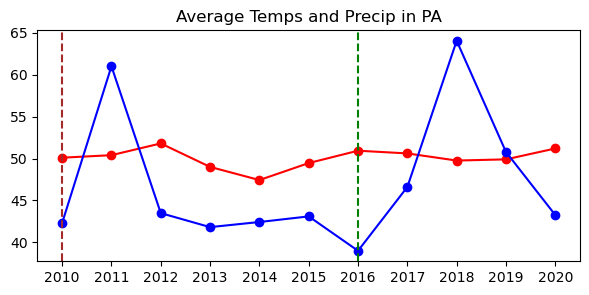

In [60]:
#Make a visual with both
fig, ax = plt.subplots(figsize=(7,3))
#plot temps in red
ax.plot(pa_combined['Year'],pa_combined['Temp'],marker='o',label='Average Temperature',color='red')
#plot precip in blue
ax.plot(pa_combined['Year'],pa_combined['Precip'], marker='o',label='Average Precipitation',color='blue')
#see each year by using ticks
ax.set_xticks(pa_combined['Year'])
ax.set_title('Average Temps and Precip in PA')
#add note for 2018
pa_best = 2016
ax.axvline(x=pa_boom,color='green',linestyle='--')
pa_worst = 2010
ax.axvline(x=pa_worst,color='brown',linestyle='--')

plt.show()